In [38]:
import torch
import torch.utils.data as data_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [39]:
diamonds_data = pd.read_csv("datasets/diamonds.csv", index_col=0)

diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [40]:
diamonds_data.shape

(53940, 10)

In [41]:
diamonds_data = diamonds_data.sample(5000, replace=False)

In [42]:
diamonds_data["cut"].value_counts()

Ideal        1991
Premium      1311
Very Good    1081
Good          481
Fair          136
Name: cut, dtype: int64

In [43]:
diamonds_data["color"].value_counts()

G    1028
E     933
F     850
H     780
D     617
I     520
J     272
Name: color, dtype: int64

In [44]:
diamonds_data["clarity"].value_counts()

SI1     1192
VS2     1141
SI2      832
VS1      765
VVS2     480
VVS1     375
IF       151
I1        64
Name: clarity, dtype: int64

In [45]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.792106,61.74712,57.411160,3885.080200,5.721450,5.723428,3.532974
std,0.467311,1.44668,2.230534,3922.502148,1.109376,1.102274,0.688266
min,0.210000,43.00000,51.000000,327.000000,3.850000,3.860000,0.000000
25%,0.400000,61.00000,56.000000,954.750000,4.720000,4.720000,2.910000
50%,0.700000,61.90000,57.000000,2351.000000,5.680000,5.690000,3.520000
75%,1.040000,62.50000,59.000000,5261.000000,6.530000,6.530000,4.030000
max,3.110000,79.00000,73.000000,18779.000000,9.420000,9.260000,5.980000


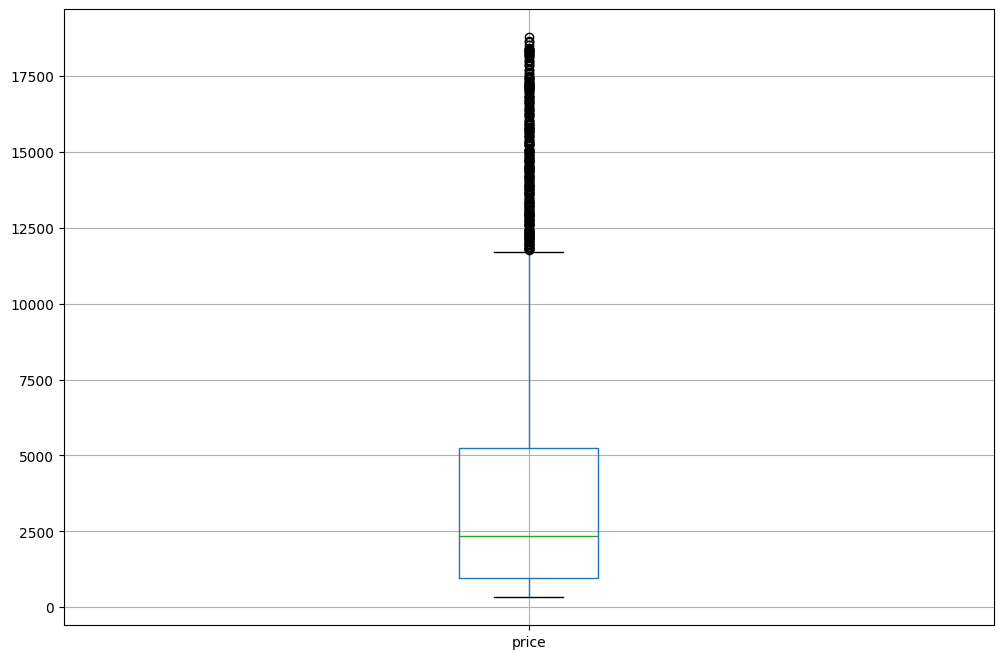

In [46]:
plt.figure(figsize=(12, 8))

diamonds_data.boxplot("price")

plt.show()

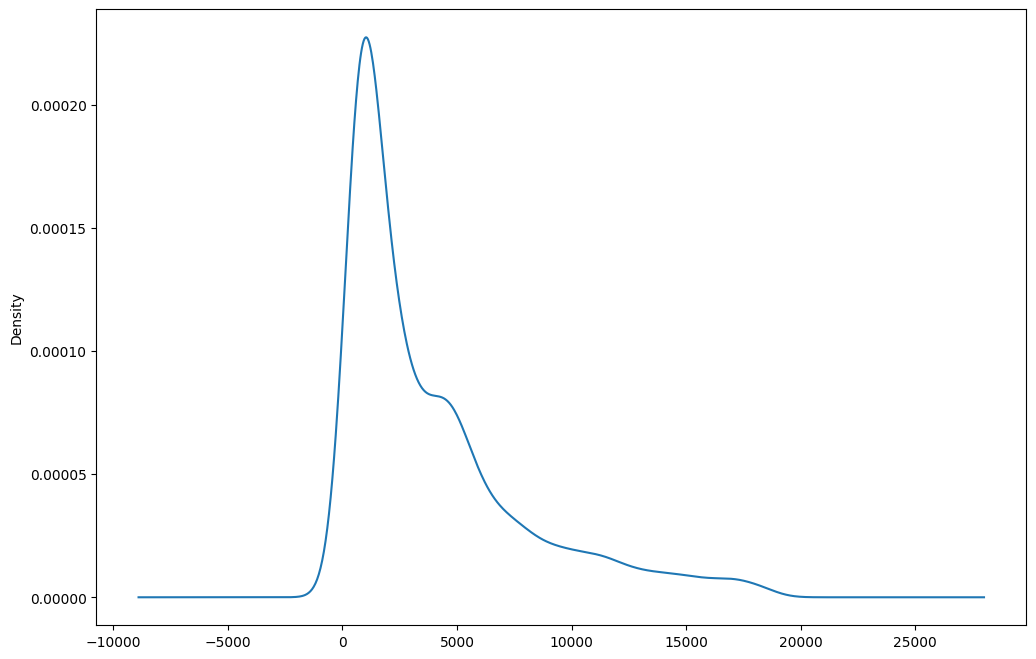

In [47]:
plt.figure(figsize=(12, 8))

diamonds_data["price"].plot.kde()

plt.show()

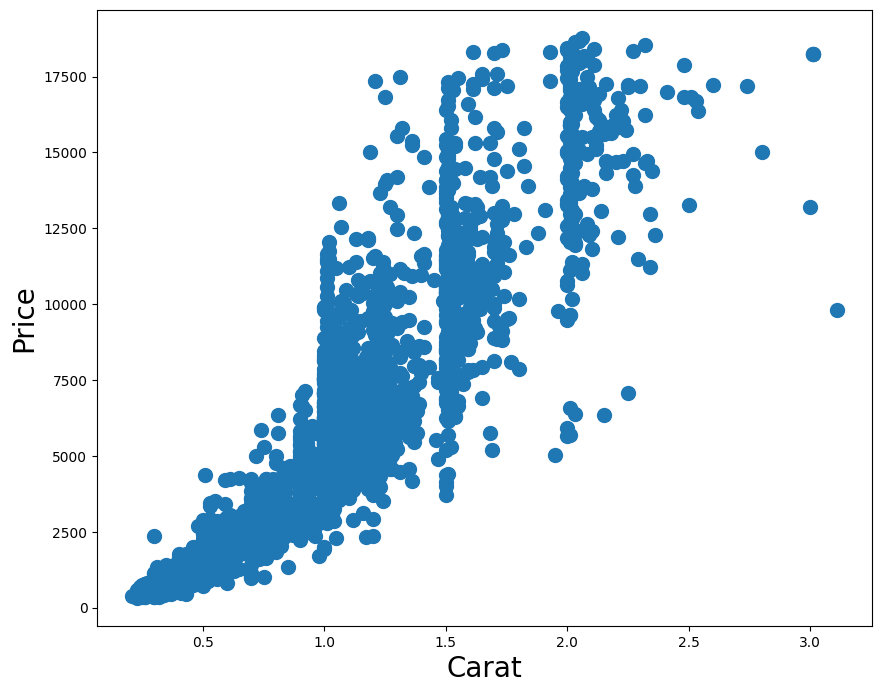

In [48]:
plt.figure(figsize=(10, 8))

plt.scatter(diamonds_data["carat"], diamonds_data["price"], s=100)

plt.xlabel("Carat", fontsize=20)
plt.ylabel("Price", fontsize=20)

plt.show()

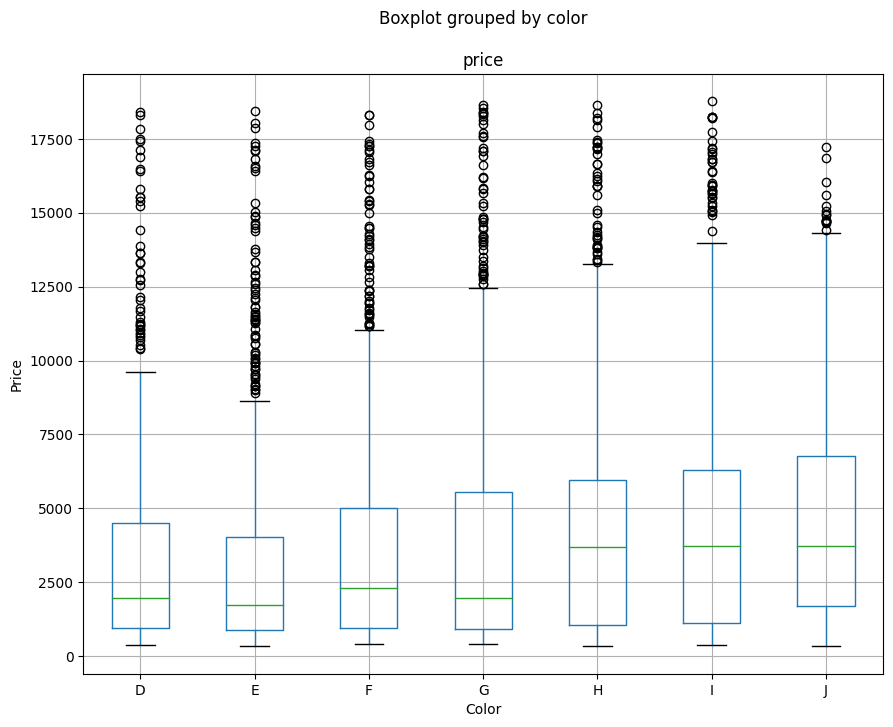

In [49]:
diamonds_data.boxplot("price", "color", figsize=(10, 8))

plt.xlabel("Color")
plt.ylabel("Price")

plt.show()

In [50]:
diamonds_data_corr = diamonds_data.corr()

diamonds_data_corr

C:\Users\natha\AppData\Local\Temp\ipykernel_8368\710583191.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds_data_corr = diamonds_data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.036983,0.176015,0.923565,0.978133,0.976824,0.974641
depth,0.036983,1.000000,-0.265501,-0.000213,-0.016998,-0.020873,0.096126
table,0.176015,-0.265501,1.000000,0.115119,0.192302,0.186392,0.153167
price,0.923565,-0.000213,0.115119,1.000000,0.889140,0.890471,0.882960
x,0.978133,-0.016998,0.192302,0.889140,1.000000,0.998407,0.988729
y,0.976824,-0.020873,0.186392,0.890471,0.998407,1.000000,0.988217
z,0.974641,0.096126,0.153167,0.882960,0.988729,0.988217,1.000000


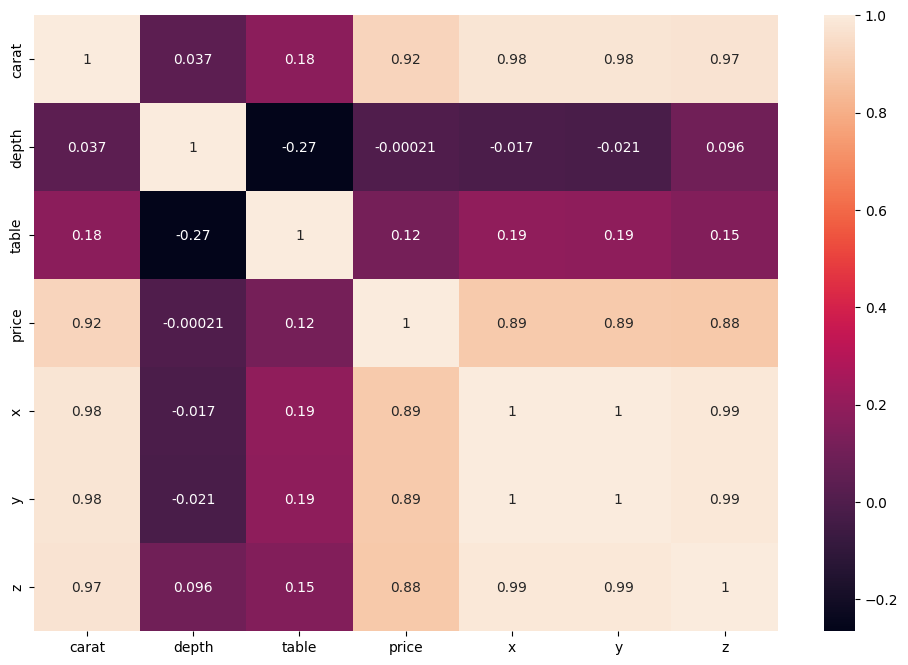

In [51]:
plt.subplots(figsize=(12, 8))

sns.heatmap(diamonds_data_corr, annot=True)

plt.show()

In [52]:
features = diamonds_data.drop("price", axis=1)

target = diamonds_data[["price"]]

In [53]:
features.head()

,carat,cut,color,clarity,depth,table,x,y,z
35334,0.32,Ideal,E,VS1,61.6,55.0,4.43,4.46,2.74
25163,1.50,Premium,G,VS1,62.7,58.0,7.32,7.20,4.55
32626,0.23,Very Good,E,VVS2,61.4,55.0,3.92,3.99,2.43
1971,0.87,Ideal,F,SI2,62.2,56.0,6.03,6.13,3.78
47945,0.55,Ideal,I,VVS1,61.6,55.0,5.26,5.30,3.25


In [54]:
categorical_features = features[["color", "cut", "clarity"]].copy()

categorical_features.head()

,color,cut,clarity
35334,E,Ideal,VS1
25163,G,Premium,VS1
32626,E,Very Good,VVS2
1971,F,Ideal,SI2
47945,I,Ideal,VVS1


In [55]:
numeric_features = features.drop(["color", "cut", "clarity"], axis=1)

numeric_features.head()

,carat,depth,table,x,y,z
35334,0.32,61.6,55.0,4.43,4.46,2.74
25163,1.50,62.7,58.0,7.32,7.20,4.55
32626,0.23,61.4,55.0,3.92,3.99,2.43
1971,0.87,62.2,56.0,6.03,6.13,3.78
47945,0.55,61.6,55.0,5.26,5.30,3.25


In [56]:
categorical_features["color"].unique()

array(['E', 'G', 'F', 'I', 'H', 'D', 'J'], dtype=object)

In [57]:
categorical_features["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [58]:
categorical_features["clarity"].unique()

array(['VS1', 'VVS2', 'SI2', 'VVS1', 'SI1', 'VS2', 'IF', 'I1'],
      dtype=object)

In [59]:
color_dict = {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}
categorical_features["color"].replace(color_dict, inplace=True)
categorical_features.head()

,color,cut,clarity
35334,1,Ideal,VS1
25163,3,Premium,VS1
32626,1,Very Good,VVS2
1971,2,Ideal,SI2
47945,5,Ideal,VVS1


In [60]:
cut_dict = {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}
categorical_features["cut"].replace(cut_dict, inplace=True)
categorical_features.head()

,color,cut,clarity
35334,1,4,VS1
25163,3,3,VS1
32626,1,2,VVS2
1971,2,4,SI2
47945,5,4,VVS1


In [61]:
clarity_dict = {
    "I1": 0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}
categorical_features["clarity"].replace(clarity_dict, inplace=True)
categorical_features.head()

,color,cut,clarity
35334,1,4,4
25163,3,3,4
32626,1,2,5
1971,2,4,1
47945,5,4,6


In [62]:
numeric_features.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.792106,61.74712,57.411160,5.721450,5.723428,3.532974
std,0.467311,1.44668,2.230534,1.109376,1.102274,0.688266
min,0.210000,43.00000,51.000000,3.850000,3.860000,0.000000
25%,0.400000,61.00000,56.000000,4.720000,4.720000,2.910000
50%,0.700000,61.90000,57.000000,5.680000,5.690000,3.520000
75%,1.040000,62.50000,59.000000,6.530000,6.530000,4.030000
max,3.110000,79.00000,73.000000,9.420000,9.260000,5.980000


In [63]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(
    standardScaler.fit_transform(numeric_features),
    columns=numeric_features.columns,
    index=numeric_features.index,
)

numeric_features.describe()

,carat,depth,table,x,y,z
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,5.400125e-17,3.207390e-15,-4.260414e-15,6.821210e-17,-1.620037e-16,-1.048761e-15
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.245774e+00,-1.296002e+01,-2.874559e+00,-1.687108e+00,-1.690700e+00,-5.133668e+00
25%,-8.391520e-01,-5.164894e-01,-6.327189e-01,-9.028052e-01,-9.104165e-01,-9.052264e-01
50%,-1.971174e-01,1.056870e-01,-1.843510e-01,-3.736709e-02,-3.032943e-02,-1.885216e-02
75%,5.305217e-01,5.204713e-01,7.123849e-01,7.289062e-01,7.318078e-01,7.222148e-01
max,4.960560e+00,1.192704e+01,6.989536e+00,3.334235e+00,3.208754e+00,3.555706e+00


In [64]:
processed_features = pd.concat(
    [numeric_features, categorical_features], axis=1, ignore_index=True, sort=False
)

processed_features.head()

,0,1,2,3,4,5,6,7,8
35334,-1.010361,-0.101705,-1.081087,-1.164240,-1.146316,-1.152249,1,4,4
25163,1.514975,0.658733,0.264017,1.441090,1.339703,1.477813,3,3,4
32626,-1.202972,-0.239967,-1.081087,-1.624004,-1.572750,-1.602701,1,2,5
1971,0.166702,0.313079,-0.632719,0.278157,0.368885,0.358947,2,4,1
47945,-0.518135,-0.101705,-1.081087,-0.415996,-0.384179,-0.411182,5,4,6


In [65]:
x_train, x_test, y_train, y_test = train_test_split(
    processed_features, target, test_size=0.2, random_state=1
)

In [66]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [67]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([4000, 9]), torch.Size([4000, 1]))

In [68]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([1000, 9]), torch.Size([1000, 1]))

In [69]:
x_train_tensor[:5]

tensor([[-0.3897, -1.6226,  0.7124, -0.1546, -0.1211, -0.3240,  4.0000,  4.0000,
          7.0000],
        [-0.7963,  0.2439, -0.6327, -0.8397, -0.8197, -0.8035,  1.0000,  2.0000,
          5.0000],
        [ 0.4663, -1.4843,  1.6091,  0.7199,  0.6774,  0.4897,  3.0000,  3.0000,
          2.0000],
        [ 0.2309,  0.5896,  0.2640,  0.3773,  0.4505,  0.4897,  4.0000,  2.0000,
          3.0000],
        [ 0.9371, -0.3782,  0.2640,  1.0715,  1.0131,  0.9838,  2.0000,  3.0000,
          1.0000]])

In [70]:
y_train_tensor[:5]

tensor([[2461.],
        [1167.],
        [4672.],
        [3989.],
        [6038.]])

In [71]:
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = data_utils.DataLoader(train_data, batch_size=500, shuffle=True)

In [72]:
len(train_loader)

8

In [73]:
input_layer = x_train_tensor.shape[1]

output_layer = 1

hidden_layer = 12

loss_fn = torch.nn.MSELoss()

In [74]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_layer, hidden_layer),
    torch.nn.Linear(hidden_layer, output_layer),
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)